# **Asignatura**: Aprendizaje Automático

**Práctica 3**: Introducción a Deep Learning

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 23 de Mayo de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>Pablo Martín Palomino</mark>





**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Clasificación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de clasificar imágenes que contienen prendas de ropa, prediciendo la categoría de la imagen de entrada que contiene la prenda. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Han Xiao, Kashif Rasul, Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, Technical Report, ArXiv, 2017 (URL: <a href="https://arxiv.org/abs/1708.07747">https://arxiv.org/abs/1708.07747</a>).

## El conjunto de datos

**Fashion-MNIST** es un conjunto de datos que contiene imágenes de artículos de venta online desde la web de **Zalando**. Se distribuye en dos conjuntos de entrenamiento (60.000 imágenes) y test (10.000 imágenes) de prendas de ropa en escala de grises, donde cada imagen tiene un tamaño de 28 filas y 28 columnas. Cada una de las prendas se corresponde con una etiqueta entre 10 classes posibles:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

Una muestra de ejemplo del contenido del conjunto de datos se ilustra en la siguiente figura:

<center>
<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" />
</center>


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático con **Keras** capaz de identificar, si es posible, la categoría a la que pertenece cada prenda de ropa, tratando de alcanzar el máximo rendimiento en la resolución del problema.

El dataset se encuentra disponible en **Keras**, y puede leerse como se muestra en la siguiente celda de código:

In [1]:
import tensorflow as tf

Train, Test= tf.keras.datasets.fashion_mnist.load_data()
print('Conjunto de training: ', type(Train), len(Train))
print('Conjunto de test: ', type(Test), len(Test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Conjunto de training:  <class 'tuple'> 2
Conjunto de test:  <class 'tuple'> 2


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos tipos de modelos distintos de **Deep Learning**: Al primero lo llamaremos **C1** y al segundo **C2**.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


Con respecto a los modelos a utilizar, partiremos de la propuesta realizada en el siguiente artículo:

- E. Xhaferra, E. Cina and L. Toti, "Classification of Standard FASHION MNIST Dataset Using Deep Learning Based CNN Algorithms," 2022 International Symposium on Multidisciplinary Studies and Innovative Technologies (ISMSIT), Ankara, Turkey, 2022, pp. 494-498, doi: 10.1109/ISMSIT56059.2022.9932737 (URL: <a href="https://ieeexplore.ieee.org/document/9932737">https://ieeexplore.ieee.org/document/9932737</a>.




La arquitectura de la red para el modelo **C1** es la siguiente:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 26x26 </td>
  <td> 1 | 6 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 26x26 | 13x13 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 13x13 | 11x11 </td>
  <td> 6 | 10 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 11x11 | 5x5 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 250 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>



Por otra parte, la arquitectura de la red para el modelo **C2** es la siguiente:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 112 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 112 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 128 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 25088 | 208 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 208 | 160 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 160 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>


**Entrene cada modelo un total de 20 épocas. Pruebe con dos tipos de tamaño de batch (64 y 1000) en cada modelo.**.

<font color="red"><b>NO OLVIDAR ACTIVAR LA GPU EN LA CONFIGURACIÓN DEL CUADERNO (Menú Editar -> Configuración del cuaderno)</b></font>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from collections import Counter
from IPython.display import Image

##Introducción previa a ejercicios

Previo a realizar ambos ejercicios voy a explicar por encima que son los modelos de deep learning y después más concretamente los modelos convolucionales.

##Modelos de Deep Learning

## ¿Qué es Deep Learning?

El **Deep Learning** (aprendizaje profundo) es una subdisciplina del **Machine Learning** que utiliza **redes neuronales artificiales profundas** para aprender automáticamente representaciones complejas a partir de grandes cantidades de datos. Estas redes están inspiradas en el funcionamiento del cerebro humano, donde las **neuronas** están interconectadas para procesar información.

---

## ¿Qué es un Modelo de Deep Learning?

Un **modelo de Deep Learning** es una **red neuronal artificial compuesta por múltiples capas**, que aprende a realizar tareas como clasificación, detección, traducción, predicción o generación de datos.

Estas redes profundas pueden tener desde unas pocas hasta cientos de capas, lo que les permite aprender patrones jerárquicos y representaciones abstractas.

---

##Estructura General de una Red Neuronal Profunda

Un modelo de Deep Learning se compone típicamente de:

### 1. **Capa de Entrada (Input Layer)**
Recibe los datos iniciales, como:
- Imágenes
- Texto
- Audio

### 2. **Capas Ocultas (Hidden Layers)**
Realizan la mayor parte del procesamiento. Pueden incluir:
- Capas densas (fully connected)
- Capas convolucionales (CNN)
- Capas recurrentes (RNN)
- Capas de atención (Transformers)

Cada neurona de una capa oculta realiza esta operación matemática:

    y = f(w·x + b)

Donde:
- `x`: entrada
- `w`: pesos
- `b`: sesgo (bias)
- `f`: función de activación

### 3. **Capa de Salida (Output Layer)**
Devuelve el resultado final del modelo:
- Para clasificación: probabilidades (Softmax)
- Para regresión: valor continuo (Lineal)

---

## Tipos Comunes de Modelos de Deep Learning

| Tipo de Red       | Uso Principal                     | Características Clave                           |
|-------------------|-----------------------------------|--------------------------------------------------|
| **MLP**           | Clasificación simple              | Capas densas, entrada fija                      |
| **CNN**           | Procesamiento de imágenes         | Detecta patrones espaciales (bordes, formas)    |
| **RNN / LSTM / GRU** | Secuencias (texto, audio)     | Recuerda información en el tiempo               |
| **Transformers**  | Texto, imágenes, traducción       | Usa mecanismos de atención                      |
| **Autoencoders**  | Reducción de dimensionalidad       | Aprende a codificar y reconstruir               |
| **GANs**          | Generación de contenido            | Dos redes compiten: generador vs. discriminador |

---

In [3]:
image_url = 'https://iddigitalschool.com/bootcamps/wp-content/uploads/2021/11/deep-learning-proceso.png'

Image(url=image_url)

En particular en está práctica se va a trabajar bastante con modelos convolucionales luego voy a explicar más profundamente su idea y su funcionamiento. En los ejercicios se profundizará más en los diversos aspectos que se explican de manera más general aquí.

## Modelos Convolucionales (CNN)

## ¿Qué es una Red Neuronal Convolucional?

Una **CNN (Convolutional Neural Network)** es un tipo de red neuronal especialmente diseñada para procesar **datos con estructura espacial**, como **imágenes**. Estas redes son muy efectivas en tareas de visión por computadora como:

- Clasificación de imágenes
- Detección de objetos
- Segmentación semántica
- Reconocimiento facial

Las CNNs imitan el comportamiento de la corteza visual de los animales, que reconoce primero bordes, luego formas, luego objetos completos.

---
## Conceptos de las CNN

###¿Qué son los canales?

Un canal representa una dimensión de características en una imagen o mapa de activaciones.

  - Una imagen en escala de grises tiene 1 canal: cada píxel tiene solo un valor de intensidad (0-255).

  - Una imagen a color (RGB) tiene 3 canales:

        1 para rojo

        1 para verde

        1 para azul

  - Cuantos más canales, más información extraída.

---

##Arquitectura de una CNN

Una CNN está compuesta por varios tipos de capas, usualmente:

### 1. Capa Convolucional

- Es el núcleo de la CNN.
- Aplica **filtros (kernels)** que "escanéan" la imagen para detectar patrones locales como bordes, esquinas o texturas.
- Estos filtros se **aprenden automáticamente** durante el entrenamiento.

**Operación clave:**
La convolución es una operación matemática entre un filtro (matriz pequeña) y una región de la imagen.
El resultado es una nueva **imagen filtrada** (llamada "feature map"), estos son nuevos canales.

¿Por qué se crean más canales?

Porque cada kenerl (o filtro) aprende a detectar un patrón diferente bordes, texturas, curvas, etc...

Ejemplo: Si aplicas 112 filtros a una imagen de entrada con 1 canal, obtendrás una salida con 112 canales.


In [4]:
image_url = 'https://miro.medium.com/v2/resize:fit:1400/1*CGTG-zNS5MQ1r0e27yc2gQ.png'

Image(url=image_url)

### 2. Función de Activación

- Se aplica tras cada convolución.
- Se suele usar ReLU: `f(x) = max(0, x)` pues:
  - Es simple y rápida de calcular.

  - Ayuda a evitar el problema del gradiente desvanecido (vanishing gradient).

  - Introduce no linealidad, lo que permite que las redes aprendan funciones complejas.

  - Mejora el rendimiento en redes profundas.


### 3. Capa de Pooling

- Reduce el tamaño espacial de los mapas de características.
- Mejora la eficiencia computacional.
- Ayuda a detectar características **invariantes** a la traslación.

In [5]:
image_url = 'https://media.licdn.com/dms/image/v2/D5612AQHy3unRksycRQ/article-inline_image-shrink_400_744/article-inline_image-shrink_400_744/0/1697421528475?e=2147483647&v=beta&t=POaGR5BKCdKu24Q7Z_t4sAW1CDAFl1lehpnuENIsNS0'

Image(url=image_url)

### 4. Capa Densa

- Al final de la red, se agregan capas densas para la clasificación final.
- Aplanan los mapas de características en un vector 1D.

## ¿Qué Aprende una CNN?

En lugar de aprender directamente los valores de los píxeles, la CNN aprende **filtros** que detectan patrones espaciales locales. Cada capa más profunda aprende patrones más abstractos:

- Primeras capas → bordes, líneas
- Capas intermedias → formas, texturas
- Capas finales → partes del objeto, objetos enteros

In [6]:
image_url = 'https://pochocosta.com/wp-content/uploads/2019/10/Typical_cnn-1024x315.png'

Image(url=image_url)

## Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición y Preprocesado de datos


Este proyecto se centra en la **clasificación automática de prendas de ropa** a partir de imágenes en escala de grises usando el conjunto de datos **Fashion MNIST**. El objetivo es entrenar y comparar dos modelos de clasificación:

- **Modelo C1** con esta arquitectura:
<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 26x26 </td>
  <td> 1 | 6 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 26x26 | 13x13 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 13x13 | 11x11 </td>
  <td> 6 | 10 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 11x11 | 5x5 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 250 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>
- **Modelo C2** con esta otra arquitectura:
<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 112 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 112 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 128 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 25088 | 208 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 208 | 160 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 160 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>


###Objetivo

Evaluar la **precisión y eficiencia de ambos modelos** al clasificar imágenes en una de las **10 clases** de artículos de ropa proporcionadas por **Zalando** con diversos batchsizes como 64 y 1000.

---

In [7]:
# Cargar y preparar los datos
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Distribución de clases en el set de entrenamiento:
Ankle boot (9): 6000
T-shirt/top (0): 6000
Dress (3): 6000
Pullover (2): 6000
Sneaker (7): 6000
Sandal (5): 6000
Trouser (1): 6000
Shirt (6): 6000
Coat (4): 6000
Bag (8): 6000

Distribución de clases en el set de prueba:
Ankle boot (9): 1000
Pullover (2): 1000
Trouser (1): 1000
Shirt (6): 1000
Coat (4): 1000
Sandal (5): 1000
Sneaker (7): 1000
Dress (3): 1000
Bag (8): 1000
T-shirt/top (0): 1000


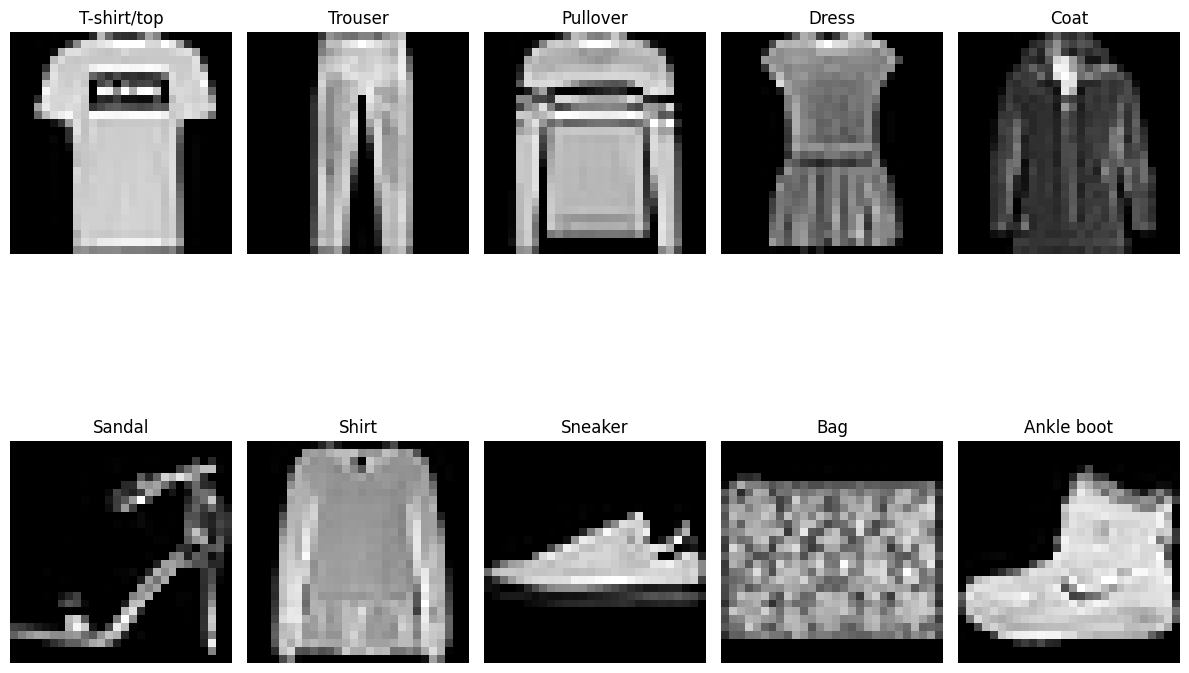

In [8]:
# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Contar cuántas muestras hay por clase en entrenamiento y prueba
train_class_counts = Counter(y_train)
test_class_counts = Counter(y_test)

print("Distribución de clases en el set de entrenamiento:")
for class_id, count in train_class_counts.items():
    print(f"{class_names[class_id]} ({class_id}): {count}")

print("\nDistribución de clases en el set de prueba:")
for class_id, count in test_class_counts.items():
    print(f"{class_names[class_id]} ({class_id}): {count}")

# Mostrar una imagen de ejemplo de cada clase
plt.figure(figsize=(12, 10))
for i in range(10):
    idx = np.where(y_train == i)[0][0]  # primer índice de esa clase
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

##Descripción del Dataset

El dataset `fashion_mnist` podemos observar que contiene:

- **60,000 imágenes** de entrenamiento siendo 6000 de cada tipo de prenda
- **10,000 imágenes** de prueba siendo 1000 de cada tipo de prenda
- Cada imagen es de **28x28 píxeles**, en escala de grises (1 canal)
- Cada imagen está etiquetada con un número entre 0 y 9, correspondiente a una categoría de ropa.

## Solución: Modelo C1


**Modelo C1:**
<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 26x26 </td>
  <td> 1 | 6 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 26x26 | 13x13 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 13x13 | 11x11 </td>
  <td> 6 | 10 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 11x11 | 5x5 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 250 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>

Voy a explicar el significado de los elementos de la tabla para C1, no voy a explicar toda la tabla si no algunos de los elementos y los demás serán basicamente extender lo explicado aquí.

## Capa 1 Convolutional Layer

**Tipo:** Convolución  
**Parámetros:** `kernel_size=(3,3)`, `filters=6`, `padding='valid'`  
**Entrada:** Imagen 28x28x1 (escala de grises)  
**Salida:** 26x26x6

### ¿Qué hace?

- Aplica 6 **filtros convolucionales de tamaño 3x3** sobre la imagen.
- Cada filtro extrae características visuales (bordes, texturas, patrones).
- No se usa padding, así que la imagen se reduce:  
  - `(28 - 3 + 1) = 26` en ambas dimensiones.


## Capa 2 ReLU

**Tipo:** Activación  
**Entrada/Salida:** 26x26x6 (sin cambio de dimensiones)

### ¿Qué hace?

- Aplica la función `ReLU(x) = max(0, x)` a cada valor.
- **Introduce no linealidad**, permitiendo al modelo aprender patrones complejos.
- Elimina valores negativos, ayudando a que la red sea más eficiente.

## Capa 3 MaxPooling

**Tipo:** Pooling (reducción espacial)  
**Parámetros:** `pool_size=(2,2)`  
**Entrada:** 26x26x6  
**Salida:** 13x13x6

### ¿Qué hace?

- Divide cada canal en bloques de 2x2 y toma el **valor máximo**.
- Reduce el tamaño espacial a la mitad (de 26 a 13), manteniendo los 6 canales.
- **Beneficios:** reduce la complejidad computacional y hace la red más robusta a pequeñas traslaciones.

## Capa 4 Segunda Convolución

**Tipo:** Convolución  
**Parámetros:** `kernel_size=(3,3)`, `filters=10`, `padding='valid'`  
**Entrada:** 13x13x6  
**Salida:** 11x11x10

### ¿Qué hace?

- Aplica 10 filtros 3x3 sobre la salida anterior.
- Como cada filtro observa los 6 canales previos, esta capa aprende **combinaciones más complejas de características**.
- Al no usar padding, las dimensiones bajan a `(13 - 3 + 1) = 11`.

## Capa 6  Batch Normalization

**Tipo:** Normalización por lotes  
**Entrada/Salida:** 11x11x10

### ¿Qué hace?

- Normaliza los valores de activación canal por canal, usando media y desviación estándar del batch.
- **Beneficios:** estabiliza el entrenamiento, acelera la convergencia y reduce overfitting.

---

## Capa 8 Flatten (No esta en la tabla pero necesaria)

**¿Por qué es necesaria?**

Las capas convolucionales y de pooling trabajan con tensores 3D (alto × ancho × canales), pero las capas densas trabajan con vectores 1D.

Antes de la primera capa FC, la salida del último MaxPooling es un tensor de tamaño 5x5x10 = 250 valores.

Para poder conectar esta salida con una Dense(units=128), necesitamos convertir ese tensor 3D en un vector plano de tamaño 250.

**Tipo:** Aplanado  
**Entrada:** Tensor 5x5x10 = 250 valores  
**Salida:** Vector 1D de 250

### ¿Qué hace?

- Convierte la salida tridimensional (5,5,10) en un vector plano de 250 elementos.
- Este vector alimentará las capas densas (Fully Connected).

## Capa 9 Fully Connected

**Tipo:** Densa  
**Parámetros:** `units=128`  
**Entrada:** Vector 250  
**Salida:** Vector 128

### ¿Qué hace?

- Aprende una combinación no lineal de las 250 características detectadas.
- La salida es una representación más abstracta del contenido de la imagen.

---

## Capa 11 Fully Connected de salida

**Tipo:** Densa  
**Parámetros:** `units=10`
**Entrada:** Vector 128  
**Salida:** Vector 10 probabilidades por clase

### ¿Qué hace?

- Produce una **probabilidad para cada una de las 10 clases** con la función de activación `activation='softmax'`.
- La clase con mayor probabilidad será la predicción del modelo.

In [9]:
def build_model_C1():
    model = models.Sequential()

    # Capa 1 - Conv 3x3: de 1 canal a 6 canales, salida 26x26
    model.add(layers.Conv2D(6, kernel_size=(3, 3), input_shape=(28, 28, 1)))  # No padding → reduce tamaño
    model.add(layers.ReLU())

    # MaxPooling 2x2: reduce 26x26 a 13x13
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Capa 2 - Conv 3x3: de 6 a 10 canales, salida 11x11
    model.add(layers.Conv2D(10, kernel_size=(3, 3)))  # No padding → reduce tamaño
    model.add(layers.ReLU())

    # Normalización por lotes
    model.add(layers.BatchNormalization())

    # MaxPooling 2x2: reduce 11x11 a 5x5
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten: 10 canales * 5 * 5 = 250
    model.add(layers.Flatten())

    # FC1: 250 → 128
    model.add(layers.Dense(128))
    model.add(layers.ReLU())

    # FC2: 128 → 10 (clases)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Crear y compilar el modelo
model_C1 = build_model_C1()
model_C1.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Mostrar resumen
model_C1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 26, 26, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 10)     │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 11, 11, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 11, 11, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,068 (133.08 KB)

 Trainable params: 34,048 (133.00 KB)

 Non-trainable params: 20 (80.00 B)

Voy a explicar ahora esta línea:

  *model_C1.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])*

##1. **optimizer='adam'**
Optimizer (optimizador) es el algoritmo que se utiliza para actualizar los pesos del modelo durante el proceso de entrenamiento.

Adam (Adaptive Moment Estimation) es uno de los optimizadores más populares, ya que adapta las tasas de aprendizaje para cada parámetro del modelo de forma dinámica.

Es ideal para entrenar redes neuronales porque puede manejar de manera efectiva tanto gradientes pequeños como grandes, y generalmente converge más rápido que otros métodos como el Stochastic Gradient Descent.

## **Conceptos Clave de adam**
Combina ideas de:
- **Momentum**: Acelera la convergencia usando un promedio móvil de gradientes.
- **RMSProp**: Adapta el *learning rate* por parámetro con gradientes al cuadrado.

---

## **Parámetros Principales**
| Parámetro | Valor típico | Descripción |
|-----------|-------------|-------------|
| `β₁` (beta1) | `0.9` | Decaimiento para el primer momento (media de gradientes). |
| `β₂` (beta2) | `0.999` | Decaimiento para el segundo momento (varianza de gradientes). |
| `α` (learning rate) | `0.001` | Tasa de aprendizaje base. |
| `ε` (epsilon) | `1e-8` | Pequeña constante para evitar división por cero. |

---

## **Algoritmo Paso a Paso**
Para cada parámetro en cada iteración:

1. **Calcular el gradiente**

2. **Actualizar el primer momento (media)**

3. **Actualizar el segundo momento (varianza)**

4. **Corrección de bias** (para evitar sesgo inicial)

5. **Actualizar el parámetro**:

---

## **Ventajas de Adam**
- Adapta el *learning rate* automáticamente por parámetro.
- Combina *Momentum* y *RMSProp* para convergencia rápida.
- Robustez en problemas con gradientes ruidosos o dispersos.

---

## **Pseudocódigo**

    m = 0  # Primer momento (media)

    v = 0  # Segundo momento (varianza)

    t = 0  # Paso de tiempo

    for epoch in epochs:
        t += 1
        gradients = compute_gradients(loss, params)
        
        # Actualizar momentos
        m = beta1 * m + (1 - beta1) * gradients
        v = beta2 * v + (1 - beta2) * gradients**2
        
        # Corrección de bias
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        
        # Actualizar parámetros
        params -= learning_rate * m_hat / (sqrt(v_hat) + epsilon)

##2. **loss='sparse_categorical_crossentropy'**
La función de pérdida es la medida de qué tan bien está aprendiendo el modelo. En otras palabras, indica cuán cerca o lejos están las predicciones del modelo de los valores reales.

Sparse Categorical Crossentropy es una versión de la función de pérdida de Categorical Crossentropy utilizada cuando las etiquetas son números enteros.

En nuestros datos, cada imagen tiene una etiqueta que corresponde a una categoría de ropa. Estas etiquetas son números enteros (0-9) que representan las 10 clases.

Si usas categorical_crossentropy, las etiquetas deberían estar en formato one-hot que serían vectores de 10 elementos con un 1 en la posición de la clase y ceros en el resto. Sin embargo, sparse_categorical_crossentropy funciona con las etiquetas como números enteros (0, 1, 2,... 9), que es más sencillo de manejar y más eficiente en memoria.

##3. **metrics=['accuracy']**
Metrics son las métricas que deseas evaluar durante el entrenamiento y la evaluación del modelo.

Accuracy es una métrica común en clasificación. Mide el porcentaje de predicciones correctas sobre el total de muestras.

Durante el entrenamiento, se calcula la precisión en cada paso para ver qué tan bien el modelo está aprendiendo y prediciendo las categorías correctas de las imágenes del dataset.

In [10]:
# Normalizar y ajustar dimensión (canal único)
#Convierte los pixeles de enteros (0–255) a flotantes (0.0–1.0).
#Por qué: Normalizar ayuda a que el modelo entrene más rápido y de forma más estable.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Añadimos una dimensión al final → de [28, 28] a [28, 28, 1].
#Por qué: Las capas Conv2D esperan entradas con forma [alto, ancho, canales].
#En este caso, tenemos 1 canal porque las imágenes son en escala de grises.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [11]:
# Entrenamiento con 20 épocas, batch_size 64 y val_split 0.2
history_c1=model_C1.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7579 - loss: 0.6807 - val_accuracy: 0.8406 - val_loss: 0.4297
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8734 - loss: 0.3446 - val_accuracy: 0.8706 - val_loss: 0.3426
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8915 - loss: 0.2937 - val_accuracy: 0.8813 - val_loss: 0.3248
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.2686 - val_accuracy: 0.8811 - val_loss: 0.3250
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9073 - loss: 0.2494 - val_accuracy: 0.8899 - val_loss: 0.3071
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9124 - loss: 0.2339 - val_accuracy: 0.8907 - val_loss: 0.3081
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9195 - loss: 0.2125 - val_accuracy: 0.8825 - val_loss: 0.3292
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9249 - loss: 0.2015 - val_accuracy:

Podemos observar que el tiempo de entrenamiento no es excesivamente largo además también observemos que lo que se nos muestra durante el entrenamiento tiene sentido:

**Epoch 1/20** implica que es la primera época de 20.

**Hay 750 pasos (batches)** en esta época 60,000-(60,000*0.2) / 64 = 750.

**5ms/step** Indica el tiempo por batch.

**accuracy: 0.7563** Es la precisión (accuracy) en el conjunto de entrenamiento al final de la época.

**loss: 0.6802** Es la pérdida en el conjunto de entrenamiento.

**val_accuracy: 0.8583** Precisión en el conjunto de validación.

**val_loss: 0.3853** Pérdida en el conjunto de validación.

Podemos observar que conforme van avanzando las épocas vamos obteniendo menos pérdida y mayor precisión, lo cual es lo esperable.


In [12]:
test_loss, test_accuracy = model_C1.evaluate(x_test, y_test, verbose=1)
print(f'Pérdida en test: {test_loss:.4f}')
print(f'Precisión en test: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8823 - loss: 0.4465
Pérdida en test: 0.4276
Precisión en test: 0.8846


##Métricas  
     - TP: Verdaderos Positivos
     - TN: Verdaderos Negativos
     - FP: Falsos Positivos
     - FN: Falsos Negativos

1. **Accuracy (Precisión):** Representa la proporción de predicciones correctas sobre el total de predicciones. Se calcula como:

  Accuracy = (TP + TN) / (TP + TN + FP + FN)

2. **Precision:** Indica la proporción de predicciones positivas correctas sobre el total de predicciones positivas. Se calcula como:

  Precision = TP / (TP + FP)

3. **Recall (Sensibilidad):** Representa la proporción de positivos reales identificados correctamente sobre el total de positivos reales. Se calcula como:

  Recall = TP / (TP + FN)

4. **F1 Score:** Es la media armónica entre Precision y Recall, proporcionando un balance entre ambas métricas. Se calcula como:

  F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

5. **Matriz de Confusión:** Es una tabla que muestra la distribución de las predicciones correctas e incorrectas por clase, permitiendo visualizar el rendimiento del modelo en cada categoría.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.82      0.83      1000
           3       0.89      0.90      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.96      0.96      1000
           6       0.66      0.68      0.67      1000
           7       0.92      0.97      0.95      1000
           8       0.97      0.96      0.96      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



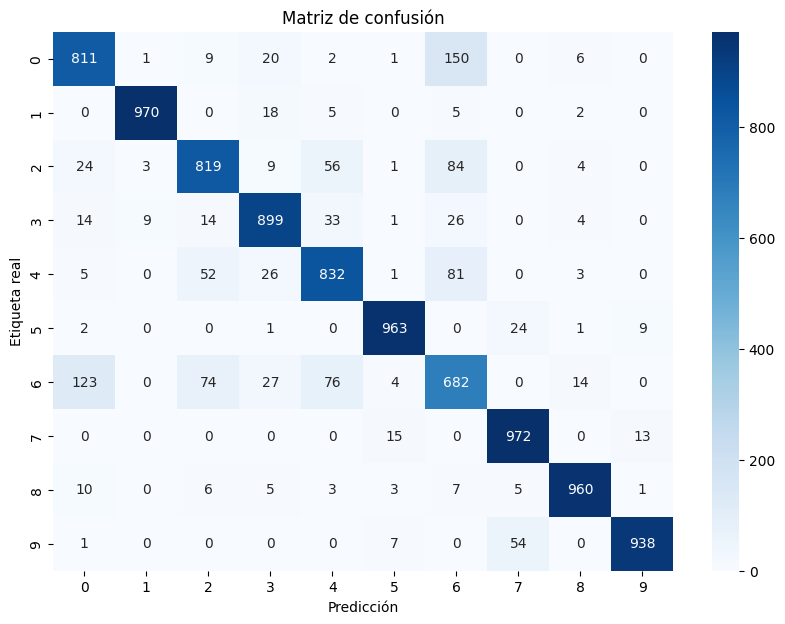

In [13]:
y_pred_prob = model_C1.predict(x_test)       # Probabilidades por clase
y_pred = y_pred_prob.argmax(axis=1)          # Clase con mayor probabilidad

# Reporte
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de confusión')
plt.show()

Podemos observar un gran rendimiento en la clasificación de las prendas de ropa. De hecho los errores más comunes son confundir T-shirt/Top y shirt , que sinceramente , no es un error muy grande. Podemos ver métricas más métricas aparte del accuracy en la celda de código anterior pero como una imagen habla más que mil palabras voy a gráficarlas.

<Figure size 1200x600 with 0 Axes>

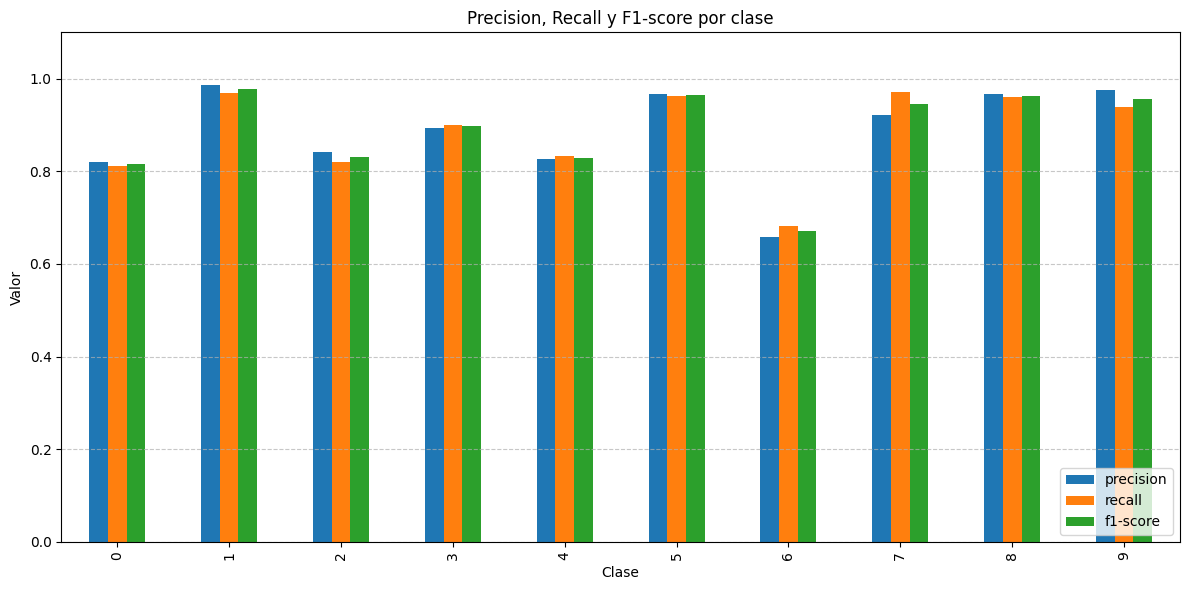

In [14]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir a DataFrame y eliminar filas no numéricas (como "accuracy", "macro avg")
df_report = pd.DataFrame(report).transpose()
df_report = df_report.loc[df_report.index.str.isdigit()]  # Solo clases 0-9
df_report = df_report.astype(float)  # Asegurar que sean numéricos

plt.figure(figsize=(12, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))

plt.title('Precision, Recall y F1-score por clase')
plt.xlabel('Clase')
plt.ylabel('Valor')
plt.ylim(0, 1.1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Observamos que en general clasifica muy bien todas las clases de ropa, de hecho la que peor clasifica es la ya mencionada shirt que es la que tiene menos valor en las métricas.

In [15]:
# Construimos modelo para batch de 1000
model_C1_1000 = build_model_C1()
model_C1_1000.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
# Entrenamiento BATCH 1000
history_c1_1000=model_C1_1000.fit(x_train, y_train, epochs=20, batch_size=1000, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5103 - loss: 1.4472 - val_accuracy: 0.5562 - val_loss: 1.9260
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8082 - loss: 0.5158 - val_accuracy: 0.7396 - val_loss: 1.7212
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8484 - loss: 0.4247 - val_accuracy: 0.8189 - val_loss: 1.4993
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8632 - loss: 0.3781 - val_accuracy: 0.8439 - val_loss: 1.2801
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8749 - loss: 0.3535 - val_accuracy: 0.8467 - val_loss: 1.0566
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8809 - loss: 0.3275 - val_accuracy: 0.8618 - val_loss: 0.8292
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8863 - loss: 0.3134 - val_accuracy: 0.8643 - val_loss: 0.6648
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8909 - loss: 0.3029 - val_accuracy: 0.8660 - val_los

In [16]:
test_loss, test_accuracy = model_C1_1000.evaluate(x_test, y_test, verbose=1)
print(f'Pérdida en test: {test_loss:.4f}')
print(f'Precisión en test: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8849 - loss: 0.3344
Pérdida en test: 0.3237
Precisión en test: 0.8846


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.85      0.82      1000
           3       0.84      0.93      0.89      1000
           4       0.83      0.77      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.69      0.68      0.69      1000
           7       0.94      0.95      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



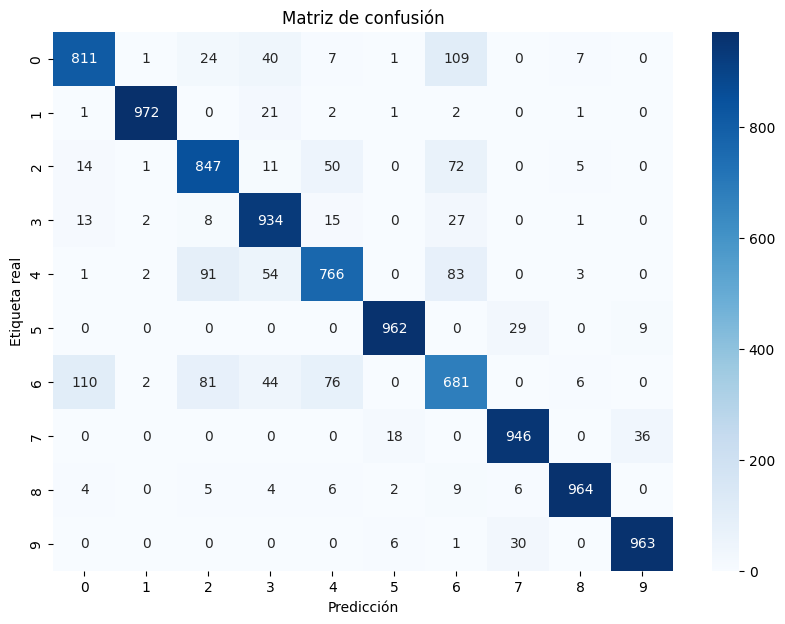

In [17]:
y_pred_prob = model_C1_1000.predict(x_test)  # Probabilidades por clase
y_pred = y_pred_prob.argmax(axis=1)          # Clase con mayor probabilidad

# Reporte
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de confusión')
plt.show()

<Figure size 1200x600 with 0 Axes>

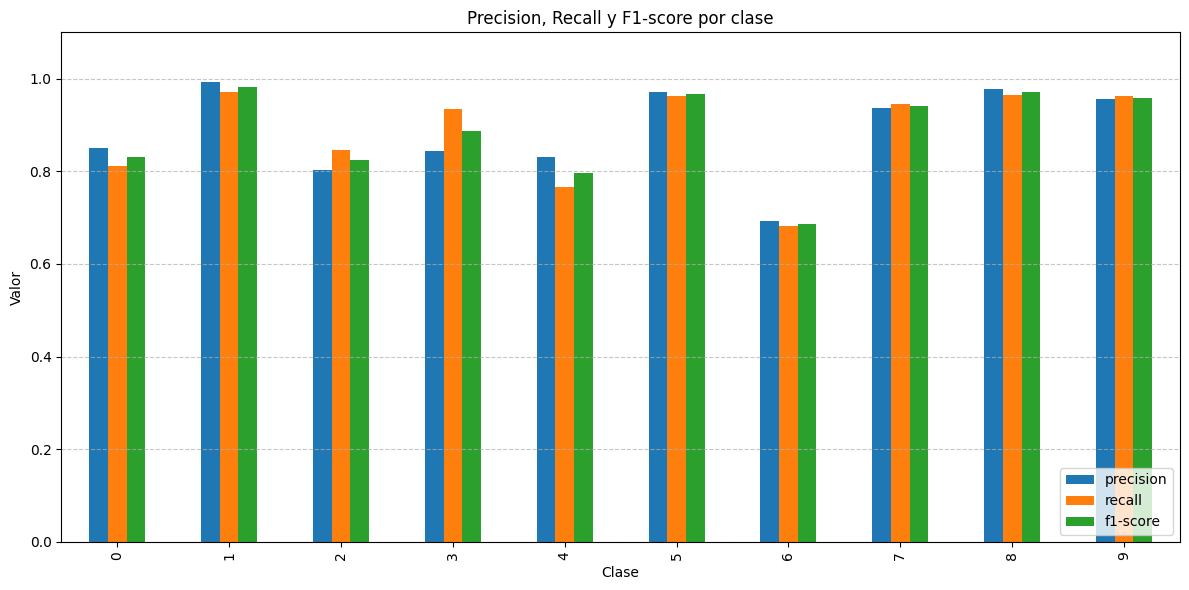

In [18]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir a DataFrame y eliminar filas no numéricas (como "accuracy", "macro avg")
df_report = pd.DataFrame(report).transpose()
df_report = df_report.loc[df_report.index.str.isdigit()]  # Solo clases 0-9
df_report = df_report.astype(float)  # Asegurar que sean numéricos

plt.figure(figsize=(12, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))

plt.title('Precision, Recall y F1-score por clase')
plt.xlabel('Clase')
plt.ylabel('Valor')
plt.ylim(0, 1.1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Podemos ver que no hay una mejora excesiva respecto a entrenar con batch_size 64

## Solución: Modelo C2

**Modelo C2:**
<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 112 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 112 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 128 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 25088 | 208 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 208 | 160 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 160 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>

Lo único novedoso en la tabla respecto al modelo C1 es que a parte de tener más capas, se introduce capas de Dropout. Expliquemosla:

## Capas Dropout (0.1)
¿Qué hace?

Desactiva aleatoriamente el 10% de las neuronas durante el entrenamiento.

- Previene overfitting.

In [19]:
def build_model_C2():
    model = models.Sequential()

    # Conv 3x3, 1 -> 112 canales
    model.add(layers.Conv2D(112, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Conv 3x3, 112 -> 64
    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Conv 3x3, 64 -> 128
    model.add(layers.Conv2D(128, kernel_size=(3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # MaxPooling - reduce de 28x28 a 14x14
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten: 128 canales * 14 * 14 = 25088
    model.add(layers.Flatten())

    # FC1: 25088 -> 208
    model.add(layers.Dense(208))
    model.add(layers.Dropout(0.1))
    model.add(layers.ReLU())

    # FC2: 208 -> 160
    model.add(layers.Dense(160))
    model.add(layers.Dropout(0.1))
    model.add(layers.ReLU())

    # FC3: 160 -> 128
    model.add(layers.Dense(128))
    model.add(layers.Dropout(0.1))
    model.add(layers.ReLU())

    # Salida: 128 -> 10 clases
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Crear y compilar el modelo
model_C2 = build_model_C2()
model_C2.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Mostrar resumen del modelo
model_C2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 112)    │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 112)    │           448 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 28, 28, 112)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        64,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 208)            │     5,218,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 160)            │        33,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_11 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,414,618 (20.66 MB)

 Trainable params: 5,414,010 (20.65 MB)

 Non-trainable params: 608 (2.38 KB)

In [20]:
# Entrenamiento
history_c2=model_C2.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7233 - loss: 0.9826 - val_accuracy: 0.8785 - val_loss: 0.3294
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8754 - loss: 0.3487 - val_accuracy: 0.8945 - val_loss: 0.2871
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9001 - loss: 0.2743 - val_accuracy: 0.9137 - val_loss: 0.2422
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9167 - loss: 0.2322 - val_accuracy: 0.9084 - val_loss: 0.2678
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9244 - loss: 0.2064 - val_accuracy: 0.9233 - val_loss: 0.2190
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9343 - loss: 0.1810 - val_accuracy: 0.9231 - val_loss: 0.2123
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9416 - loss: 0.1559 - val_accuracy: 0.9217 - val_loss: 0.2230
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9505 - loss: 0.1380 - 

Podemos ver que tarda mucho más en entrenar este modelo, lo cual tiene sentido pues tiene mucho mayor número de parámetros

In [21]:
test_loss, test_accuracy = model_C2.evaluate(x_test, y_test, verbose=1)
print(f'Pérdida en test: {test_loss:.4f}')
print(f'Precisión en test: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9212 - loss: 0.3846
Pérdida en test: 0.3893
Precisión en test: 0.9204


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.91      0.93      0.92      1000
           4       0.92      0.82      0.86      1000
           5       1.00      0.97      0.98      1000
           6       0.76      0.80      0.78      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



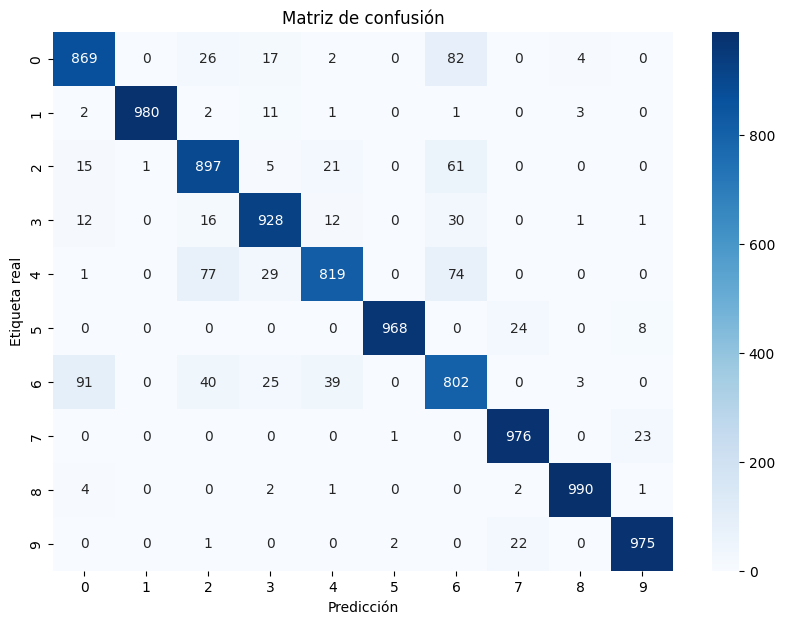

In [22]:
y_pred_prob = model_C2.predict(x_test)       # Probabilidades por clase
y_pred = y_pred_prob.argmax(axis=1)          # Clase con mayor probabilidad

# Reporte
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de confusión')
plt.show()

Observamos que tambien predice de manera muy buena los textiles en su clase.

<Figure size 1200x600 with 0 Axes>

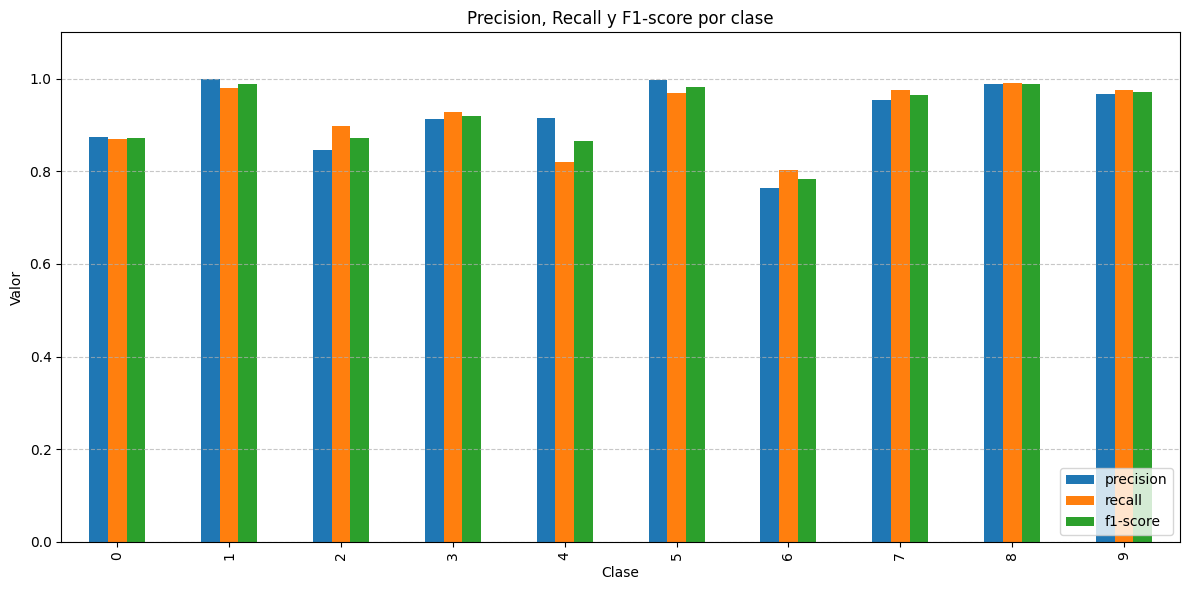

In [23]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir a DataFrame y eliminar filas no numéricas (como "accuracy", "macro avg")
df_report = pd.DataFrame(report).transpose()
df_report = df_report.loc[df_report.index.str.isdigit()]  # Solo clases 0-9
df_report = df_report.astype(float)  # Asegurar que sean numéricos

plt.figure(figsize=(12, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))

plt.title('Precision, Recall y F1-score por clase')
plt.xlabel('Clase')
plt.ylabel('Valor')
plt.ylim(0, 1.1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [24]:
model_C2_1000 = build_model_C2()
model_C2_1000.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Entrenamiento 1000
history_c2_1000=model_C2_1000.fit(x_train, y_train, epochs=20, batch_size=1000, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - accuracy: 0.4575 - loss: 2.5257 - val_accuracy: 0.2087 - val_loss: 2.2149
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 191ms/step - accuracy: 0.8045 - loss: 0.5334 - val_accuracy: 0.1276 - val_loss: 2.3860
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.8470 - loss: 0.4268 - val_accuracy: 0.1080 - val_loss: 2.5763
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.8618 - loss: 0.3778 - val_accuracy: 0.1116 - val_loss: 2.4978
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.8841 - loss: 0.3227 - val_accuracy: 0.1493 - val_loss: 2.5872
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.8932 - loss: 0.2927 - val_accuracy: 0.2542 - val_loss: 2.3910
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.9048 - loss: 0.2651 - val_accuracy: 0.3266 - val_loss: 2.1254
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.9145 - loss: 0.2360 - val_accur

In [25]:
test_loss, test_accuracy = model_C2.evaluate(x_test, y_test, verbose=1)
print(f'Pérdida en test: {test_loss:.4f}')
print(f'Precisión en test: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9212 - loss: 0.3846
Pérdida en test: 0.3893
Precisión en test: 0.9204


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.90      0.89      1000
           3       0.90      0.95      0.92      1000
           4       0.88      0.90      0.89      1000
           5       0.99      0.99      0.99      1000
           6       0.87      0.68      0.77      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.92     10000



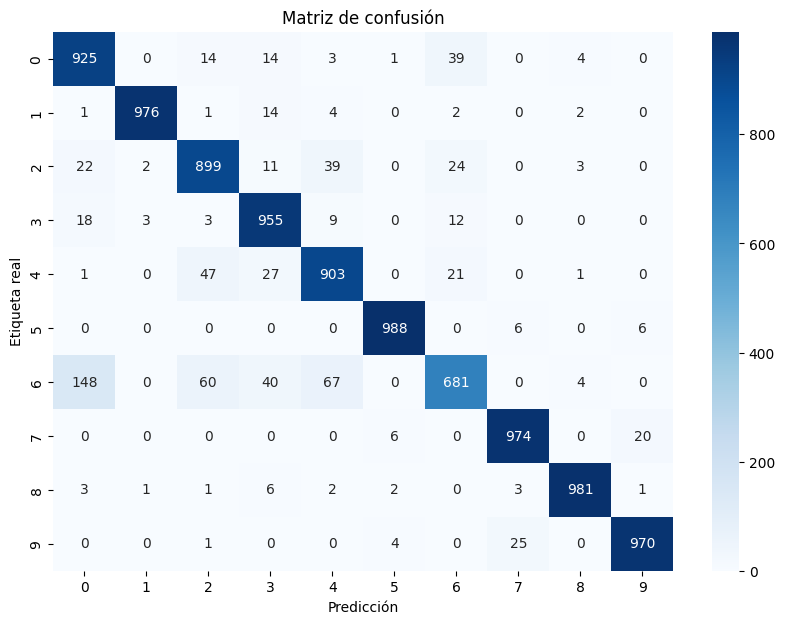

In [26]:
y_pred_prob = model_C2_1000.predict(x_test)  # Probabilidades por clase
y_pred = y_pred_prob.argmax(axis=1)          # Clase con mayor probabilidad

# Reporte
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de confusión')
plt.show()

<Figure size 1200x600 with 0 Axes>

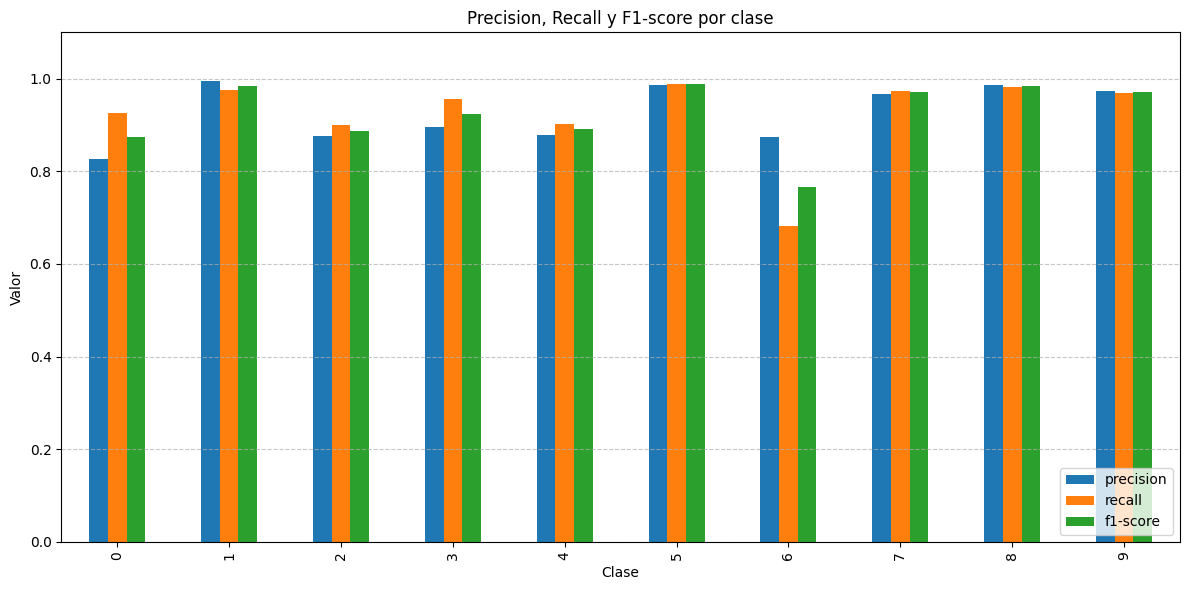

In [27]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir a DataFrame y eliminar filas no numéricas (como "accuracy", "macro avg")
df_report = pd.DataFrame(report).transpose()
df_report = df_report.loc[df_report.index.str.isdigit()]  # Solo clases 0-9
df_report = df_report.astype(float)  # Asegurar que sean numéricos

plt.figure(figsize=(12, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))

plt.title('Precision, Recall y F1-score por clase')
plt.xlabel('Clase')
plt.ylabel('Valor')
plt.ylim(0, 1.1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Comparativa de los modelos C1 y C2

In [51]:
test_loss_c1, test_acc_c1 = model_C1.evaluate(x_test, y_test, verbose=0)
test_loss_c2, test_acc_c2 = model_C2.evaluate(x_test, y_test, verbose=0)

In [52]:
def plot_history(histories, names):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    for hist, name in zip(histories, names):
        plt.plot(hist.history['val_accuracy'], label=f'{name} Val Acc')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    for hist, name in zip(histories, names):
        plt.plot(hist.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

##Comparacion propia
Vamos a comparar C1 con batch 64 y 1000

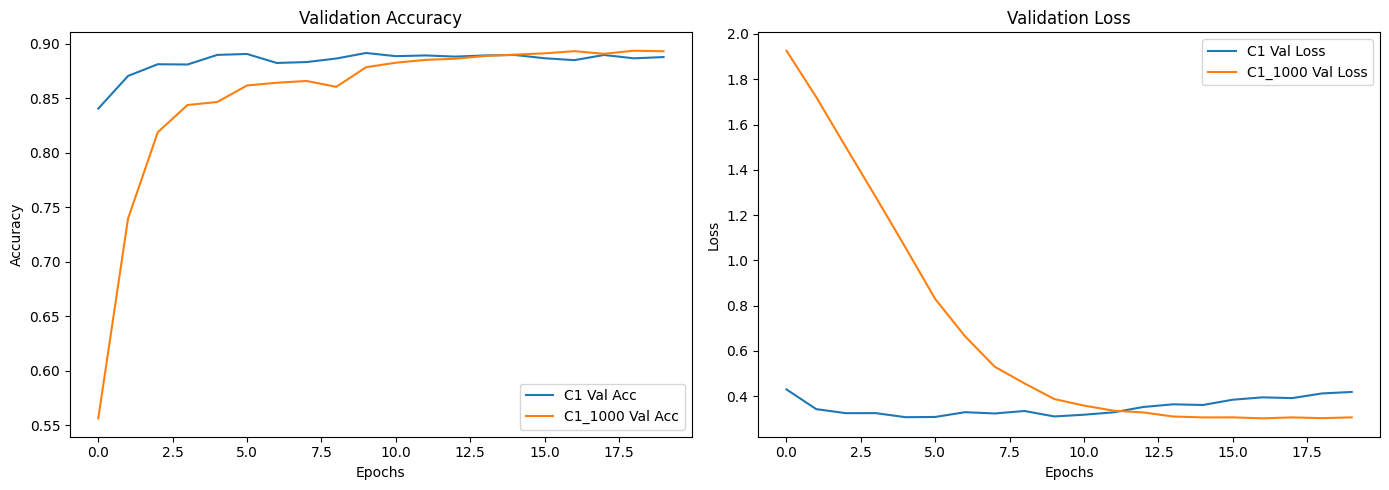

In [53]:
plot_history([history_c1, history_c1_1000], ['C1', 'C1_1000'])

Observar que el validation loss en batch_size 1000 empieza siendo mucho mayor, esto se debe a:

**Ruido en los Gradientes**

Con batch sizes pequeños, los gradientes tienen mayor varianza, lo que actúa como un regularizador implícito y ayuda al modelo a escapar de mínimos locales.

Al aumentar el batch size, los gradientes son más precisos, pero esto reduce la exploración del espacio de parámetros, llevando a convergencia en regiones menos óptimas al inicio.

---

**Inicialización del Optimizador**

El Optimizador Adam normaliza los pasos de actualización usando estimaciones de primer y segundo momento.

Con batch sizes grandes, las estimaciones iniciales de momentos son más estables pero pueden ser demasiado conservadoras, ralentizando el ajuste inicial.

---

**Generalización y Sobreajuste Temprano**

Batch sizes grandes pueden llevar a una mayor memorización en las primeras épocas, ya que cada paso de gradiente cubre más datos pero con menos "exploración".

El validation loss refleja esta falta de adaptación inicial a patrones generalizables.

---

**Ajuste del Learning Rate**

Batch sizes grandes suelen requerir mayores learning rates para compensar la reducción de actualizaciones por época (regla lineal: LR_new = LR_base × (batch_size / base_batch_size)). Lo que requiere una actualización adecuada del LR que personalmente no he controlado.


Podemos observar que realmente el validation accuracy converge a un número parecido luego no veo muy relevante coger entre uno y otro, quiza por la función de pérdida usar c1_1000.

Vamos a comparar C2 con batch 64 y 1000

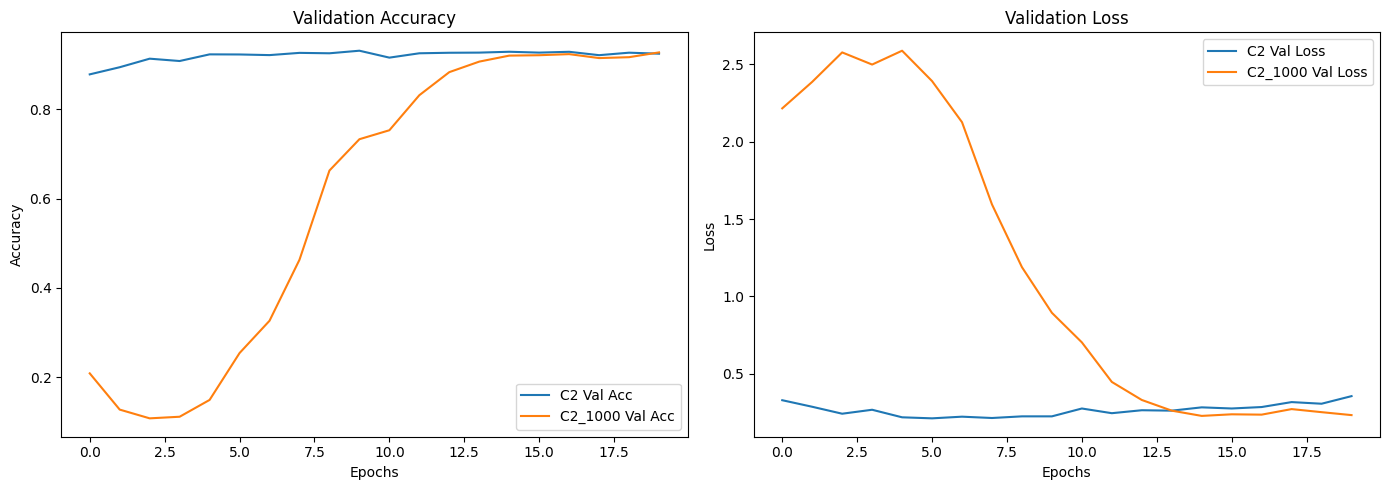

In [31]:
plot_history([history_c2, history_c2_1000], ['C2', 'C2_1000'])

Podemos observar que realmente el validation accuracy converge a un número parecido luego no veo muy relevante coger entre uno y otro, quiza por la función de pérdida usar c2_1000.

Comparacion modelos con batch 64

Comparemos ahora C1 y C2 con batch_size 64

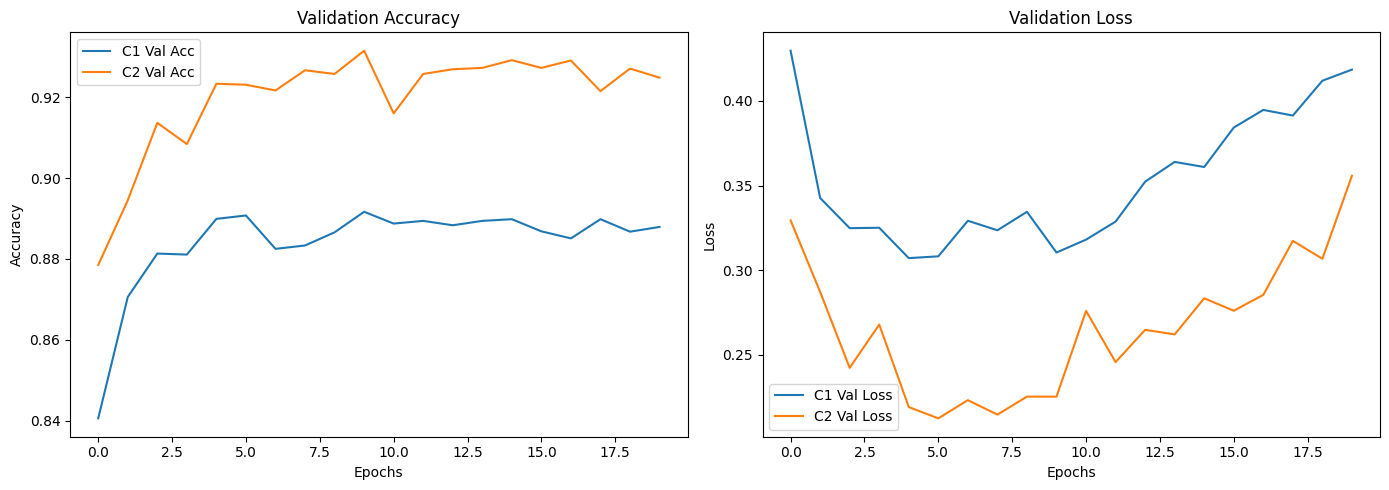

In [32]:
plot_history([history_c1, history_c2], ['C1', 'C2'])

In [33]:
results = pd.DataFrame({
    'Modelo': ['C1', 'C2'],
    'Test Accuracy': [test_acc_c1, test_acc_c2],
    'Test Loss': [test_loss_c1, test_loss_c2]
})

print(results)

  Modelo  Test Accuracy  Test Loss
0     C1         0.8846   0.427606
1     C2         0.9204   0.389332


Claramente vemos que el C2 funciona mejor, da un mejor accuracy, pero tarda muchisimo en entrenar en comparación al C1.

PARA TAMAÑO 1000

In [34]:
test_loss_c1_1000, test_acc_c1_1000 = model_C1_1000.evaluate(x_test, y_test, verbose=0)
test_loss_c2_1000, test_acc_c2_1000 = model_C2_1000.evaluate(x_test, y_test, verbose=0)

Comparacion batch 1000

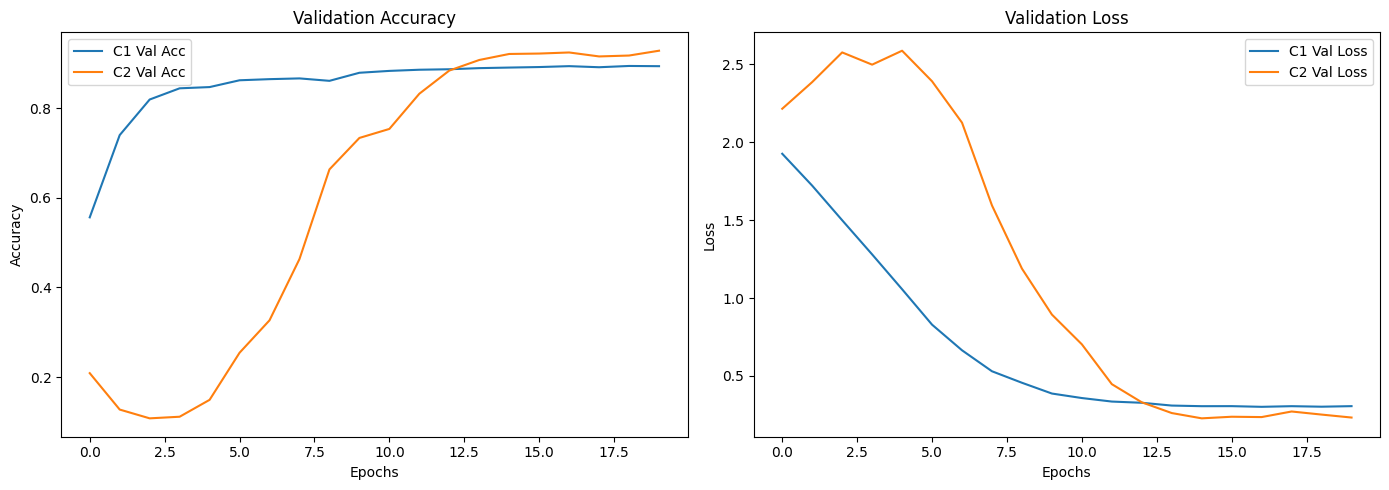

In [35]:
plot_history([history_c1_1000, history_c2_1000], ['C1', 'C2'])

In [36]:
results_1000 = pd.DataFrame({
    'Modelo': ['C1_1000', 'C2_1000'],
    'Test Accuracy': [test_acc_c1_1000, test_acc_c2_1000],
    'Test Loss': [test_loss_c1_1000, test_loss_c2_1000]
})

print(results_1000)

    Modelo  Test Accuracy  Test Loss
0  C1_1000         0.8846   0.323703
1  C2_1000         0.9252   0.259253


Claramente vemos que el C2 funciona mejor igual que en el caso 64, da un mejor accuracy, pero tarda muchisimo en entrenar en comparación al C1.

Tomando mejores

In [37]:
#Resultados todos juntos
print(results)
print(results_1000)

  Modelo  Test Accuracy  Test Loss
0     C1         0.8846   0.427606
1     C2         0.9204   0.389332
    Modelo  Test Accuracy  Test Loss
0  C1_1000         0.8846   0.323703
1  C2_1000         0.9252   0.259253


Los resultados muestran que el modelo C2 supera significativamente al C1 en las métricas, pero con un costo computacional notablemente mayor, tomando mucho tiempo de entrenamiento. Esto plantea dos reflexiones clave:

##Escalabilidad vs. Rentabilidad

Aumentar el tamaño de los parámetros en modelos de deep learning suele mejorar el rendimiento, pero con rendimientos decrecientes luego habría que hacer un análisis de trade-off entre rendimiento y costo computacional.

Por ejemplo, duplicar parámetros podría mejorar un 5% el accuracy, pero cuadruplicar el tiempo de entrenamiento.

##Conclusión:
En este caso que es un problema de juguete podemos observar que el tratar de forma más completa y compleja los datos como lo hace el modelo C2 nos da mejores resultados, y en este caso en concreto siempre se prefiriría el modelo C2 pues, como mencione es un problema de juguete pero mencionar el buen rendimiento del C1 con el poco tiempo de entrenamiento que toma.

# **Ejercicio 2: IA generativa con Autoencoders (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema utilizando autoencoders, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema  de **Inteligencia Artificial Generativa** haciendo uso de técnicas de Deep Learning para tratar de generar imágenes que contienen dígitos manuscritos.

## Contexto del problema

La **IA generativa** es un tipo de Inteligencia Artificial que se centra en crear contenido nuevo y original. Esto puede incluir texto, imágenes, música, vídeo, etc. A diferencia de otros tipos de IA que se enfocan en analizar o clasificar datos, la IA generativa utiliza modelos complejos para aprender patrones y características de los datos existentes y luego generar algo nuevo basado en ese aprendizaje.

Un ejemplo popular de IA generativa son los modelos de lenguaje, como **ChatGPT**. Estos modelos pueden escribir historias, responder preguntas o incluso mantener una conversación, todo basado en la información con la que fueron entrenados.

La IA generativa también se utiliza en el arte, donde puede crear obras visuales sorprendentes, o en la música, donde puede componer melodías. Sin embargo, es importante tener en cuenta que, aunque puede producir resultados impresionantes, la calidad y la relevancia del contenido generado pueden variar.

<center>
<img src="https://bernardmarr.com/wp-content/uploads/2024/02/13-Ways-Writers-Should-Embrace-Generative-AI.webp" />
</center>

En esta práctica **vamos a hacer uso de autoencoders** para aprender las características de dígitos manuscritos, de modo que podamos utilizar el modelo entrenado **para generar nuevos dígitos previamente inexistentes**.

En particular, el modelo que deseamos construir constará de dos partes:

- Un **encoder**, capaz de obtener una imagen de entrada conteniendo un dígito manuscrito y dar como salida su *embedding*.
- Un **decoder**, cada de generar una imagen a partir de un *embedding*.


## El conjunto de datos

Utilizaremos el conjunto de datos de Digits MNIST incluido en TensorFlow, el cual se puede cargar utilizando el código de la siguiente celda:

In [55]:
import tensorflow as tf

train, test= tf.keras.datasets.mnist.load_data()
XTrain, YTrain= train
XTest, YTest= test

## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Construcción de **tres modelos**:
    1. **Encoder**, para codificar datos de entrada en *embeddings*.
    2. **Decoder**, para decodificar *embeddings*.
    3. **Autoencoder**, formado como la concatenación secuencial del **Encoder** y el **Decoder**
5. Selección y estimación de valores para hiperparámetros.
6. Validación del modelo. Discusión de resultados y extracción de conclusiones.


Con respecto a los modelos a utilizar, usaremos la siguiente estructura para el **Encoder**:


<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 32 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 14x14 | 7x7 </td>
  <td> - </td>
</tr>
</table>


El **Decoder** deberá *deshacer* la codificación realizada por el **Encoder**, por lo que estableceremos una arquitectura de capas simétrica al primer módulo:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 7x7 | 14x14 </td>
  <td> 16 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 16 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 14x14 | 28x28 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 32 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 1 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
</table>


**Entrene el autoencoder un total de 50 épocas con tamaño de batch 1000. Use una función de pérdida habitual para resolución de problemas de regresión**.

<font color="red"><b>NO OLVIDAR ACTIVAR LA GPU EN LA CONFIGURACIÓN DEL CUADERNO (Menú Editar -> Configuración del cuaderno)</b></font>


Cuando el modelo **autoencoder** ya esté entrenado, además de su validación con el conjunto de test, realice las siguientes pruebas:

- **Usando sólo el encoder**:
   1. Seleccione todas las imágenes de un mismo dígito (por ejemplo, el dígito 0).
   2. Envíe esas imágenes como entrada al encoder, y obtenga los resultados de los embeddings.
   3. Calcule un **embedding promedio** calculando la media de cada componente de todos los embeddings.

- **Usando sólo el decoder**:
   4. Proporcione este nuevo **embedding promedio** como entrada al **Decoder**. ¿Qué se obtiene? ¿Es lógico el resultado?


- Realice los pasos anteriores del **Encoder** con todos los dígitos pero, en este caso, guarde el valor promedio y de desviación estándar (a este último lo denominaremos **embedding de desviación**.
- Genere, para cada dígito, varios **nuevos embeddings** simulando un muestreo desde una distribución normal de media el embedding promedio y desviación típica el embedding de desviación.
- Utilice los **embeddings nuevos** como entrada al módulo **Decoder**. ¿Qué se obtiene?
- Analice y discuta los resultados obtenidos.



#Problema
En este problema se busca hacer un autoencoder para la generación de digitos usando el dataset digits de mnist. Primero voy a explicar que es un autoencoder.

## AutoEncoder


## ¿Qué es un Autoencoder?

Un **autoencoder** es una clase de redes neuronales artificiales utilizadas para el aprendizaje **no supervisado** de representaciones eficientes de datos, comúnmente con fines de **reducción de dimensionalidad**, **compresión**, o **detección de anomalías**.

Un autoencoder aprende a copiar su entrada en la salida, pero lo hace obligando a los datos a pasar por un "cuello de botella" (una representación comprimida). Así, aprende una codificación útil del dato.

---

## Encoder

El **encoder** transforma un dato de entrada $ \mathbf{x} \in \mathbb{R}^n $ en una representación latente $ \mathbf{z} \in \mathbb{R}^m $, donde usualmente $ m < n $:

$$
\mathbf{z} = f_{\theta}(\mathbf{x})
$$

- $ f_{\theta} $ es una función (una red neuronal) con parámetros $ \theta $ (pesos y sesgos).
- $ \mathbf{z} $ es una representación comprimida de $ \mathbf{x} $, también llamada **embedding** o **código latente**.

---

## Decoder

El **decoder** intenta reconstruir la entrada original a partir del código latente $ \mathbf{z} $:

$$
\hat{\mathbf{x}} = g_{\phi}(\mathbf{z}) = g_{\phi}(f_{\theta}(\mathbf{x}))
$$

- $ g_{\phi} $ es otra red neuronal con parámetros $ \phi $.
- $ \hat{\mathbf{x}} $ es la **reconstrucción** de la entrada original.

---

## Objetivo de Entrenamiento

El objetivo del entrenamiento es minimizar la diferencia entre la entrada original $ \mathbf{x} $ y su reconstrucción $ \hat{\mathbf{x}} $.

Una función de pérdida común es el **error cuadrático medio (MSE)**:

$$
\mathcal{L}(\mathbf{x}, \hat{\mathbf{x}}) = \| \mathbf{x} - \hat{\mathbf{x}} \|^2
$$

O bien, si los valores están en el rango [0,1], puede usarse **entropía cruzada binaria**.

La red aprende los parámetros $ \theta $ y $ \phi $ usando métodos de optimización como **descenso del gradiente**.

---

## Aplicaciones de Autoencoders

- **Reducción de dimensionalidad**
- **Compresión de datos**
- **Eliminación de ruido** (denoising autoencoders)
- **Detección de anomalías**
- **Generación de datos** (con Autoencoders Variacionales, VAEs)

---


## Conclusión

Un autoencoder aprende a representar los datos de manera más eficiente, capturando las estructuras internas importantes. Aunque su objetivo principal es la reconstrucción, la representación latente aprendida puede ser útil para tareas como clasificación, clustering o visualización de datos.



In [56]:
image_url = 'https://charliegoldstraw.com/articles/autoencoder/assets/autoencoder.webp'

Image(url=image_url)

## Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición y Preprocesado de datos

Veamos la muestra de cuantas clases hay en los datos y la cantidad de elementos de cada clase.

Clases disponibles: [0 1 2 3 4 5 6 7 8 9]


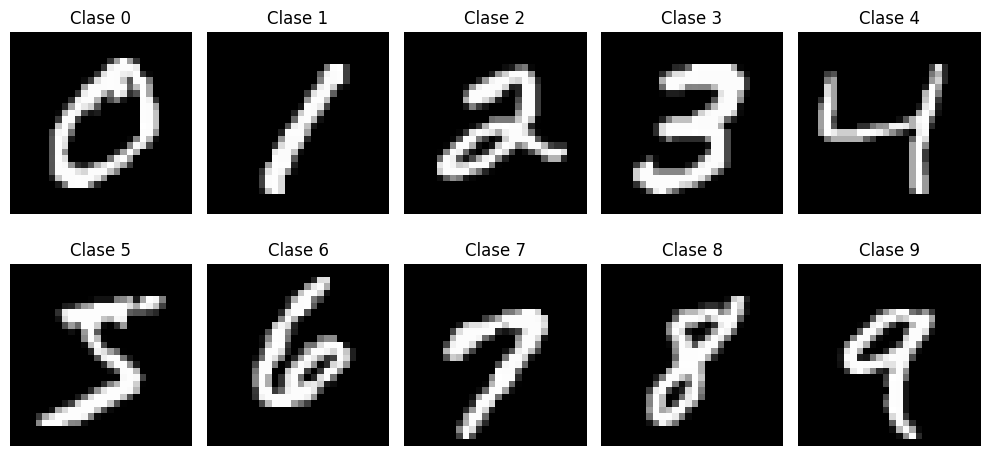

In [59]:
# Ver clases únicas
clases = np.unique(YTrain)
print("Clases disponibles:", clases)

# Mostrar un ejemplo de cada clase
plt.figure(figsize=(10, 5))
for i, clase in enumerate(clases):
    idx = np.where(YTrain == clase)[0][0]  # índice del primer ejemplo de esa clase
    plt.subplot(2, 5, i + 1)
    plt.imshow(XTrain[idx], cmap='gray')
    plt.title(f"Clase {clase}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Cantidad de imágenes por clase en el conjunto de entrenamiento:

Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imágenes
Clase 4: 5842 imágenes
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes
Clase 7: 6265 imágenes
Clase 8: 5851 imágenes
Clase 9: 5949 imágenes


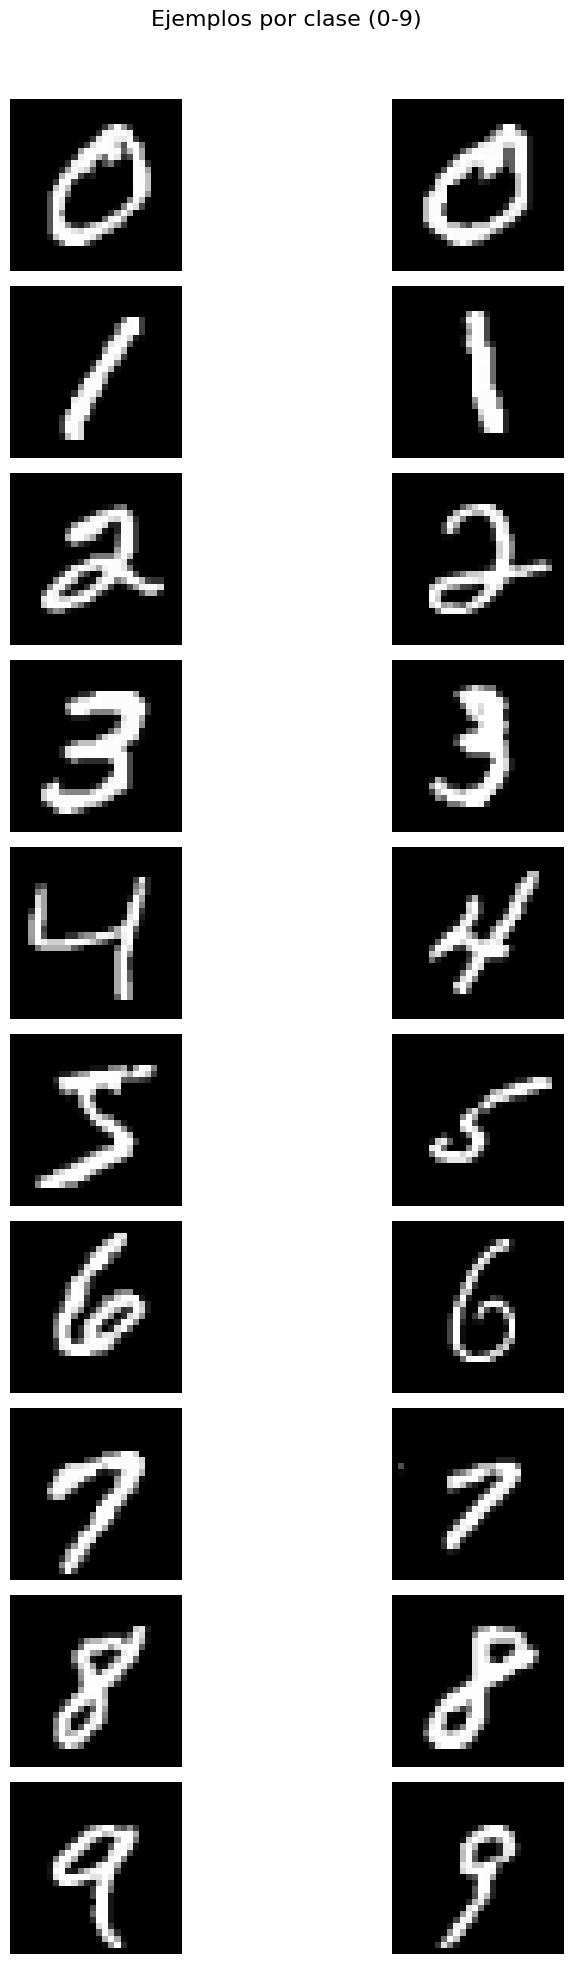

In [61]:
conteo_clases = Counter(YTrain)

print("Cantidad de imágenes por clase en el conjunto de entrenamiento:\n")
for clase in sorted(conteo_clases):
    print(f"Clase {clase}: {conteo_clases[clase]} imágenes")

# --- 2. Mostrar algunas imágenes por clase (2 por clase) ---
fig, axes = plt.subplots(10, 2, figsize=(10, 20))
fig.suptitle("Ejemplos por clase (0-9)", fontsize=16)

for clase in range(10):
    indices = np.where(YTrain == clase)[0][:2]  # Primeros 2 índices de esa clase
    for i, idx in enumerate(indices):
        ax = axes[clase, i]
        ax.imshow(XTrain[idx], cmap='gray')
        ax.axis('off')
        if i == 0:
            ax.set_ylabel(f"Clase {clase}", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Podemos ver que la muestra no es uniforme, sin embargo, no hay un desbalanceo enorme en los datos luego no pienso que sea necesario reducir muestra para que todas las cantidades sean iguales.

## Resolucion

Construimos el encoder tal como viene en la tabla, no voy a explicar la tabla pues es igual a en el ejercicio 1, no hay ninguna novedad en la tabla:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 32 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 14x14 | 7x7 </td>
  <td> - </td>
</tr>
</table>

In [40]:
# Input: imágenes 28x28 en escala de grises (1 canal)
input_img = layers.Input(shape=(28, 28, 1), name="input_layer")

# Primera capa convolucional: 64 filtros 3x3, salida 28x28x64
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', name="conv1_64")(input_img)

# Segunda capa convolucional: 32 filtros 3x3, salida 28x28x32
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', name="conv2_32")(x)

# Reducción espacial con MaxPooling: reduce a 14x14x32
x = layers.MaxPooling2D((2, 2), padding='same', name="maxpool1")(x)

# Tercera capa convolucional: 16 filtros 3x3, salida 14x14x16
x = layers.Conv2D(16, (3, 3), padding='same', activation='relu', name="conv3_16")(x)

# Segunda reducción espacial con MaxPooling: reduce a 7x7x16
encoded = layers.MaxPooling2D((2, 2), padding='same', name="maxpool2")(x)

# Definimos el modelo
encoder = models.Model(input_img, encoded, name="Encoder")

# Resumen de arquitectura
encoder.summary()

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_64 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_32 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_16 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 7, 7, 16)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,728 (92.69 KB)

 Trainable params: 23,728 (92.69 KB)

 Non-trainable params: 0 (0.00 B)

Construimos el decoder, aquí si que hay una novedad en la tabla:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 7x7 | 14x14 </td>
  <td> 16 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 16 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 14x14 | 28x28 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 32 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 1 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
</table>

### ¿Qué es UpSampling2D?

UpSampling2D es una operación que aumenta la resolución espacial de un imagen o un feature map multiplicando por un factor su tamaño en altura y ancho.

No agrega nueva información, sino que interpolará o replicará los valores existentes para generar una imagen más grande.

#### ¿Cómo lo hace?
El método por defecto es nearest neighbor , aunque también se puede usar bilinear interpolation:

**Nearest neighbor**: cada valor se replica para llenar el nuevo espacio.

**Bilinear interpolation**: los nuevos valores se interpolan suavemente entre los vecinos.

In [41]:
# Entrada del decoder: embeddings de forma (7, 7, 16)
encoded_input = layers.Input(shape=(7, 7, 16), name="decoder_input")

# 1. Subida de tamaño espacial: de 7x7 a 14x14 (canales 16)
x = layers.UpSampling2D((2, 2), name="upsample1")(encoded_input)

# 2. Convolución: de 14x14x16 a 14x14x32
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', name="conv1_32")(x)

# 3. Subida de tamaño espacial: de 14x14 a 28x28
x = layers.UpSampling2D((2, 2), name="upsample2")(x)

# 4. Convolución: de 28x28x32 a 28x28x64
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', name="conv2_64")(x)

# 5. Convolución final: de 28x28x64 a 28x28x1 (reconstrucción de la imagen original)
decoded_output = layers.Conv2D(1, (3, 3), padding='same', activation='relu', name="output_layer")(x)

# Definimos el modelo Decoder
decoder = models.Model(encoded_input, decoded_output, name="Decoder")

# Resumen de arquitectura
decoder.summary()

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsample1 (UpSampling2D)        │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_32 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsample2 (UpSampling2D)        │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_64 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Conv2D)           │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,713 (92.63 KB)

 Trainable params: 23,713 (92.63 KB)

 Non-trainable params: 0 (0.00 B)

Construimos el autoencoder como:

entrada → encoder → decoder → salida

In [42]:
# Entrada del autoencoder: imagen de 28x28x1
input_img = encoder.input  # Entrada del encoder

# Paso por el encoder → embeddings
encoded = encoder(input_img)

# Paso por el decoder → reconstrucción
decoded = decoder(encoded)

# Modelo Autoencoder completo
autoencoder = models.Model(inputs=input_img, outputs=decoded, name="Autoencoder")

# Mostrar resumen de arquitectura completa
autoencoder.summary()

Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder (Functional)            │ (None, 7, 7, 16)       │        23,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │        23,713 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,441 (185.32 KB)

 Trainable params: 47,441 (185.32 KB)

 Non-trainable params: 0 (0.00 B)

Igual que en el ejercicio anterior normalizamos los datos y los adaptamos a la entrada que espera el encoder (también igual al ejercio anterior). Volveremos a usar de optimizer adam, pero en este caso usaremos como función de perdida **MeanSquaredError**:

La función de pérdida **MSE (Mean Squared Error)** se utiliza para medir la diferencia entre las salidas originales y las salidas reconstruidas del autoencoder.

En términos generales, **cuantifica qué tan lejos están las predicciones del modelo respecto a los valores reales**, penalizando más fuertemente los errores grandes.

## Fórmula matemática

Sea:

- $y$ la salida real
- $\hat{y}$ la salida predicha
- $n$ el número total de elementos

Entonces, la pérdida MSE se define como:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Es decir, se calcula como el **promedio del cuadrado de las diferencias entre cada valor real y su valor estimado**.

En el contexto de un autoencoder, la función de pérdida MSE evalúa qué tan parecidas son estas dos imágenes **comparando píxel a píxel**.


In [43]:
# 1. Normalización y reshape
XTrain_norm = XTrain.astype('float32') / 255.0
XTrain_norm = XTrain_norm.reshape((-1, 28, 28, 1))

XTest_norm = XTest.astype('float32') / 255.0
XTest_norm = XTest_norm.reshape((-1, 28, 28, 1))

# 2. Compilación del modelo autoencoder
autoencoder.compile(optimizer='adam',
                 loss='MeanSquaredError')

# 3. Entrenamiento del modelo
history = autoencoder.fit(
    XTrain_norm, XTrain_norm,       # Entrada = Salida
    epochs=50,
    batch_size=1000,
    validation_data=(XTest_norm, XTest_norm)
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - loss: 0.0473 - val_loss: 0.0100
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0090 - val_loss: 0.0066
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0063 - val_loss: 0.0069
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0058 - val_loss: 0.0048
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - l

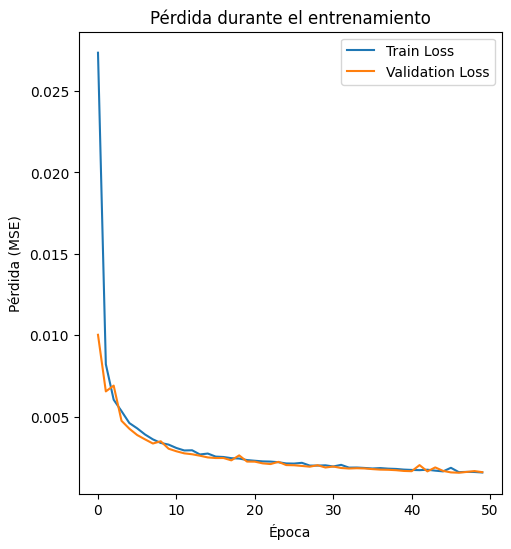

In [44]:
# Graficar el historial de entrenamiento
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Graficar pérdida de entrenamiento y validación
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida (MSE)')
    plt.legend()

# Llamar a la función con tu historial
plot_training_history(history)

Utilizamos solo el encoder para obtener la forma del embedding promedio

In [45]:
# SOLO ENCODER
# 1. Seleccionar imágenes del dígito 0
digit = 0
digit_indices = np.where(YTest == digit)[0]
digit_images = XTest[digit_indices]

# 2. Preprocesamiento: normalizar y reshape a (28, 28, 1)
digit_images = digit_images.astype('float32') / 255.0
digit_images = digit_images.reshape((-1, 28, 28, 1))

# 3. Obtener los embeddings usando el encoder
embeddings = encoder.predict(digit_images)

# 4. Calcular el embedding promedio
embedding_avg = np.mean(embeddings, axis=0)

print("Forma del embedding promedio:", embedding_avg.shape)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Forma del embedding promedio: (7, 7, 16)


Usamos solo el decoder para optener la generación de la imagen

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


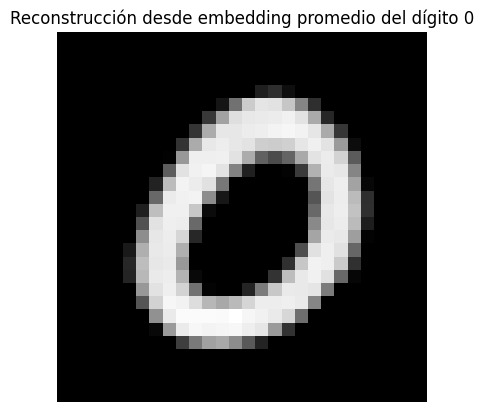

In [46]:
#SOLO DECODER
# Aseguramos que el embedding promedio tenga la forma correcta para el decoder: (1, 7, 7, 16)
embedding_avg_expanded = np.expand_dims(embedding_avg, axis=0)

# Pasar el embedding promedio por el decoder para obtener la imagen reconstruida
reconstructed_image = decoder.predict(embedding_avg_expanded)

# El resultado tendrá forma (1, 28, 28, 1) → quitamos la dimensión extra
reconstructed_image = reconstructed_image.squeeze()

# Visualizar la imagen generada
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstrucción desde embedding promedio del dígito 0")
plt.axis('off')
plt.show()

Realizamos el mismo proceso pero para todos los elementos de la clase usando la media y desviación de los embeddings del decoder

In [47]:
# Diccionarios para almacenar los promedios y desviaciones por dígito
embedding_means = {}
embedding_stds = {}

# Iteramos sobre todos los dígitos (0 a 9)
for digit in range(10):
    # 1. Seleccionar todas las imágenes de ese dígito
    digit_indices = np.where(YTest == digit)[0]
    digit_images = XTest[digit_indices]

    # 2. Normalizar y reshape
    digit_images = digit_images.astype('float32') / 255.0
    digit_images = digit_images.reshape((-1, 28, 28, 1))

    # 3. Obtener los embeddings usando el encoder
    embeddings = encoder.predict(digit_images, verbose=0)

    # 4. Calcular embedding promedio y desviación estándar
    embedding_avg = np.mean(embeddings, axis=0)
    embedding_std = np.std(embeddings, axis=0)

    # Guardar en diccionarios
    embedding_means[digit] = embedding_avg
    embedding_stds[digit] = embedding_std

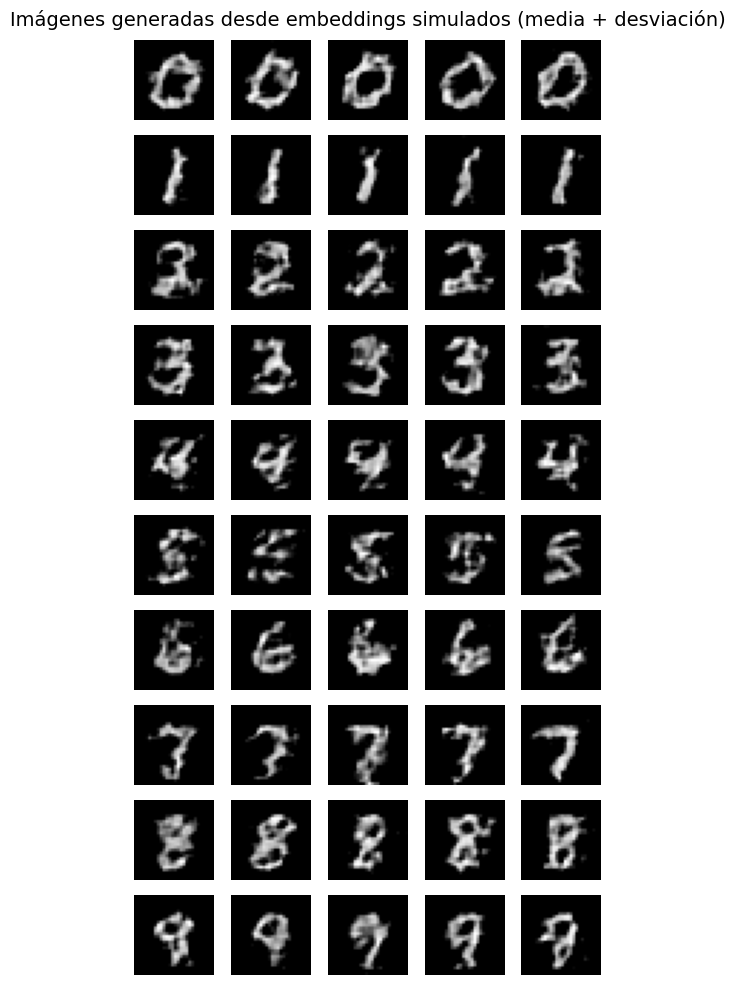

In [48]:
# Generamos y mostramos 5 imágenes nuevas por cada dígito
num_samples = 5

plt.figure(figsize=(num_samples, 10))

for digit in range(10):
    for i in range(num_samples):
        # 1. Simular nuevo embedding desde distribución normal (media + ruido)
        new_embedding = np.random.normal(
            loc=embedding_means[digit],
            scale=embedding_stds[digit]
        )

        # 2. Reshape para pasar al decoder
        new_embedding = np.expand_dims(new_embedding, axis=0)

        # 3. Decodificar imagen
        new_image = decoder.predict(new_embedding, verbose=0).squeeze()

        # 4. Mostrar la imagen
        plt.subplot(10, num_samples, digit * num_samples + i + 1)
        plt.imshow(new_image, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.ylabel(f"Dígito {digit}", fontsize=10)

plt.suptitle("Imágenes generadas desde embeddings simulados (media + desviación)", fontsize=14)
plt.tight_layout()
plt.show()

## Conclusión
Podemos ver que el modelo funciona relativamente bien pues los números son reconocibles, sin embargo, hay margen de mejora, para ello quiza se podría usar encoders con mayor número de capas y decoders con mayor número de capas. No obstante, podemos observar que para el tiempo de entreno que toma el modelo, este funciona relativamente bien.